In [1]:
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
engine = create_engine("postgresql://postgres@localhost:5432/project3")
conn = engine.connect()
session = Session(bind=engine)

In [2]:

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, ARRAY
Base = declarative_base()

# Working with the SQLAlchemy ORM.
# Define a mapped class, which maps to rows of the NC Counties database table.

# Creates an NC county class which will serve as the anchor points for our Tables.
class NCCounty(Base):
    __tablename__ = 'NC Counties'
    id = Column(Integer, primary_key=True)
    name = Column(String(255))
    boundary = Column(ARRAY(Float))
    
    
class NCLifeExpectancy(Base):
    __tablename__ = 'NC Life Expectancy'
    id = Column(Integer, primary_key=True)
    life_expectancy = Column(Float)

In [3]:
objs=session.query(NCCounty).all()

In [4]:
x=[]
y=[]
for obj in objs:
    x.extend([ pt[0] for pt in obj.boundary ])
    y.extend([ pt[1] for pt in obj.boundary ])

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()

<IPython.core.display.Javascript object>


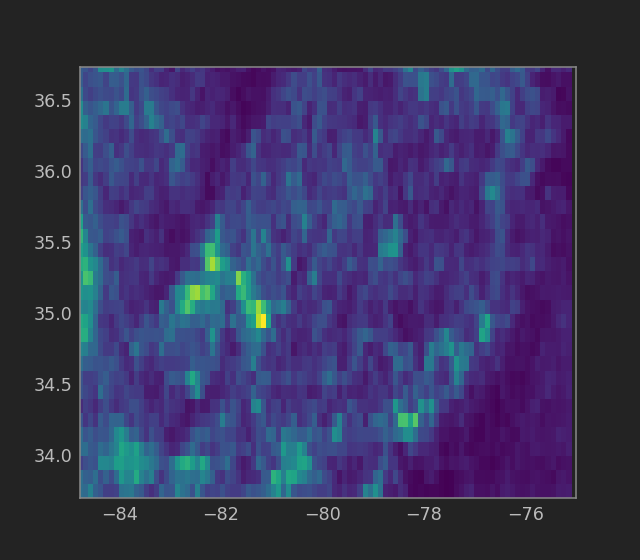

In [6]:
plt.scatter(x,y)

In [7]:
hist = pd.read_pickle('./hist2d-lightening.pkl')

In [8]:
x = []; y = []; z=[];

for coord in hist:
    x.append(coord[0])
    y.append(coord[1])
    
xvals = list(set(x))
yvals = list(set(y))

xvals.sort(); 
yvals.sort();

dat = np.zeros( [len(xvals), len(yvals)])
for coord in hist:
    dat[xvals.index(coord[0])][yvals.index(coord[1])] = hist[coord]
    
xvals=np.array(xvals);
yvals=np.array(yvals);


In [9]:
idx = (xvals < -75.0) & (xvals > -85.0)
idy = (yvals < 37.0) & (yvals > 33.0)

plt.pcolormesh(xvals[idx], yvals[idy], (dat[:,idy])[idx, :].transpose())

<IPython.core.display.Javascript object>


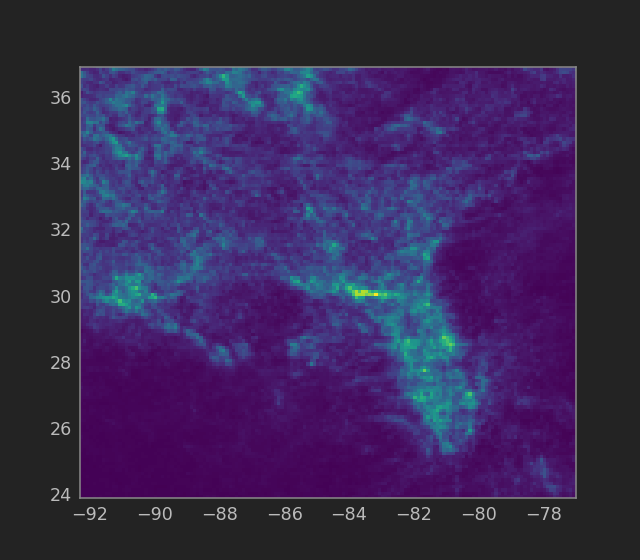

In [10]:

plt.pcolormesh(xvals, yvals, dat.transpose())